# Título: Análise de Dados
#### Disciplina: IA


**Sobre a tarefa:**
  
A tarefa consiste na análise dos dados referente a um conjunto de possíveis anúncios em páginas da Internet. Deve-se descrever as características do dataset e identificar possíveis problemas existentes, realizando, quando possível, os ajustes necessários. O código deve estar documentado com apoio da linguagem de marcação Markdown e gráficos matplotlib ou seaborn). 

**Por: João Victor de Souza e Julio Carvalho**

---

# Carregando DataSet

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [161]:
data = ('https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.data')
df_odiginal = pd.read_csv(data, header=None)
df_odiginal

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


# Fazendo algumas correções

## Removendo Valores faltantes

resolvemos lidar com estes valores removendo eles.
esses valores são representados por '?'.

In [162]:
df = df_odiginal
remove = df[(df[0].str.find('?') != -1) | (df[1].str.find('?') != -1) | (df[2].str.find('?') != -1)].index
print(remove)
df.drop(remove, inplace=True)

Int64Index([  10,   24,   62,   63,   64,   65,   72,  117,  118,  119,
            ...
            3250, 3253, 3255, 3257, 3258, 3261, 3269, 3270, 3271, 3277],
           dtype='int64', length=910)


## Removendo valores duplicados 

In [163]:
df.drop_duplicates(inplace=True) 
df

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,30,30,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


## Checando valores Na


In [164]:
df.isna().any()

0       False
1       False
2       False
3       False
4       False
        ...  
1554    False
1555    False
1556    False
1557    False
1558    False
Length: 1559, dtype: bool

Podemos ver que nao possui valores NA, pela soma desses valores abaixo

In [165]:
df.isna().sum().sum()

0

## Ajustando dimensionalidade

In [166]:
df.dtypes

0       object
1       object
2       object
3       object
4        int64
         ...  
1554     int64
1555     int64
1556     int64
1557     int64
1558    object
Length: 1559, dtype: object

Aqui vemos que todos os valores que queremos remover são do tipo **Int**.

logo:

In [167]:
df = df.select_dtypes(exclude='int')
df

,0,1,2,3,1558
0,125,125,1.0,1,ad.
1,57,468,8.2105,1,ad.
2,33,230,6.9696,1,ad.
3,60,468,7.8,1,ad.
4,60,468,7.8,1,ad.
...,...,...,...,...,...
3273,30,30,1.0,0,nonad.
3274,170,94,0.5529,0,nonad.
3275,101,140,1.3861,1,nonad.
3276,23,120,5.2173,1,nonad.


## Inserindo header na tabela

Aqui inserimos um header para melhor visualização.

In [168]:
df.columns = ['height', 'width', 'aratio', 'local', 'isad']
df

,height,width,aratio,local,isad
0,125,125,1.0,1,ad.
1,57,468,8.2105,1,ad.
2,33,230,6.9696,1,ad.
3,60,468,7.8,1,ad.
4,60,468,7.8,1,ad.
...,...,...,...,...,...
3273,30,30,1.0,0,nonad.
3274,170,94,0.5529,0,nonad.
3275,101,140,1.3861,1,nonad.
3276,23,120,5.2173,1,nonad.


## Passando os valores para seus respectivos tipos

In [169]:
df.dtypes

height    object
width     object
aratio    object
local     object
isad      object
dtype: object

In [170]:
df = df.astype({
           'height':'int',
           'width':'int',
           'aratio':'float'
})
df.dtypes

height      int64
width       int64
aratio    float64
local      object
isad       object
dtype: object

#Analisando

## Algumas infomações sobre o nosso Dataframe

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 3278
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  1968 non-null   int64  
 1   width   1968 non-null   int64  
 2   aratio  1968 non-null   float64
 3   local   1968 non-null   object 
 4   isad    1968 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 92.2+ KB


In [172]:
df.describe()

,height,width,aratio
count,1968.000000,1968.000000,1968.000000
mean,67.152947,160.889736,3.846032
std,56.070608,128.301142,5.161675
min,1.000000,1.000000,0.001500
25%,29.750000,87.000000,1.087500
50%,58.500000,114.000000,2.232950
75%,90.000000,200.000000,5.521700
max,640.000000,640.000000,60.000000


In [173]:
df.shape

(1968, 5)

## Abaixo vemos a quantidade de Anúncios e nao anúncios

In [174]:
df['isad'].value_counts()

nonad.    1638
ad.        330
Name: isad, dtype: int64

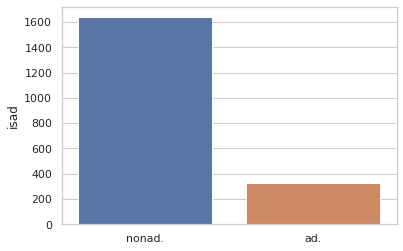

In [175]:
# ad = df['isad'].unique()
ad = ['nonad.','ad.']
cont = df['isad'].value_counts()
sns.set(style='whitegrid')
sns.barplot(x=ad,y=cont)

## Detectando outliers

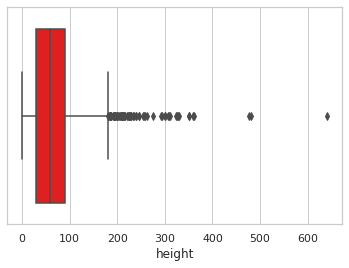

In [176]:
sns.boxplot(x=df['height'],color='red')

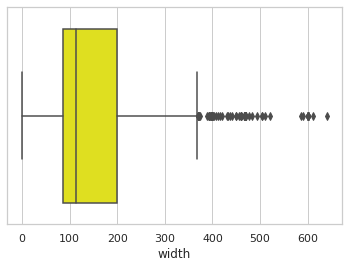

In [177]:
sns.boxplot(x=df['width'], color='yellow')

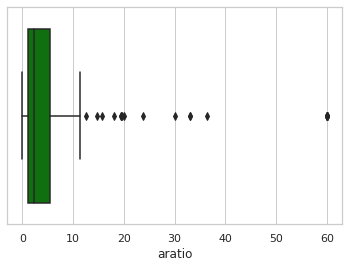

In [178]:
sns.boxplot(x=df['aratio'], color='green')

## podemos separar em ad's e nonad's para melhor visualização

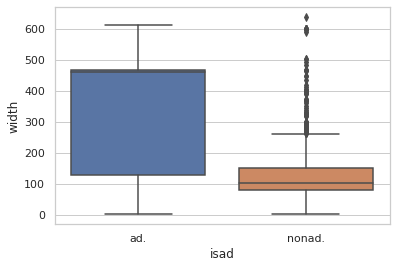

In [179]:
sns.boxplot(x=df['isad'],y=df['width'])

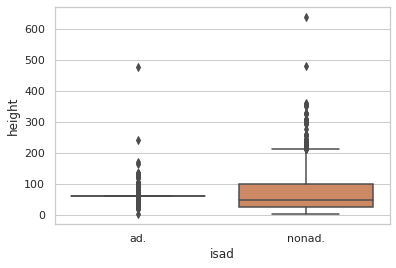

In [180]:
sns.boxplot(x=df['isad'],y=df['height'])

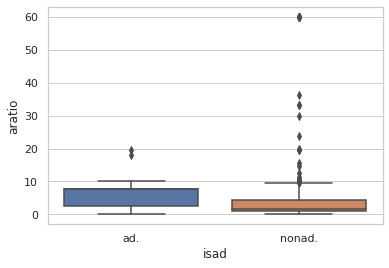

In [181]:
sns.boxplot(x=df['isad'],y=df['aratio'])

Podemos notar que os não anuncios possuem uma grande quantidade de outliers nos 3 atributos e os anuncios possuem uma grande quantidade no atributo 'height'

## Métrica Z em ad's

Redimensionano e normalizando os dados, utilizando um limite = 2

In [182]:
df_ad = df.loc[df['isad']=='ad.']
df_nonad = df.loc[df['isad']=='nonad.']
threshold = 2.5

> Para 'height':

In [183]:
z=np.abs(stats.zscore(df_ad['height']))
#print(z)

In [184]:
outl = np.where(z > threshold)
print('Vemos que o atributo height possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo height possui 4 índices

Esses indices são:
 [137 231 284 305]


> Para 'width':

In [185]:
z=np.abs(stats.zscore(df_ad['width']))
#print(z)

In [186]:
outl = np.where(z > threshold)
print('Vemos que o atributo width possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo width possui 0 índices

Esses indices são:
 []


> Para 'ratio':

In [187]:
z=np.abs(stats.zscore(df_ad['width']))
#print(z)

In [188]:
outl = np.where(z > threshold)
print('Vemos que o atributo ratio possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo ratio possui 0 índices

Esses indices são:
 []


## Métrica Z em nonad's

> Para 'height':

In [189]:
z=np.abs(stats.zscore(df_nonad['height']))
#print(z)

In [190]:
outl = np.where(z > threshold)
print('Vemos que o atributo height possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo height possui 36 índices

Esses indices são:
 [ 171  187  195  222  237  436  562  578  618  676  680  712  751  836
  873  907  934 1043 1062 1090 1138 1167 1170 1177 1192 1233 1292 1300
 1330 1354 1370 1382 1417 1453 1454 1553]


> Para 'width':


In [191]:
z=np.abs(stats.zscore(df_nonad['width']))
#print(z)

In [192]:
outl = np.where(z > threshold)
print('Vemos que o atributo width possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo width possui 52 índices

Esses indices são:
 [  57   87   96  229  320  349  383  389  419  427  436  475  562  627
  646  659  680  704  726  798  821  828  861  873  911  929  939  945
  956  971  980 1054 1088 1100 1170 1179 1183 1187 1190 1205 1225 1240
 1300 1333 1370 1403 1416 1418 1469 1478 1515 1599]


> Para 'ratio':

In [193]:
z=np.abs(stats.zscore(df_nonad['width']))
#print(z)

In [194]:
outl = np.where(z > threshold)
print('Vemos que o atributo ratio possui',len(outl[0]), 'índices\n\nEsses indices são:\n',outl[0])

Vemos que o atributo ratio possui 52 índices

Esses indices são:
 [  57   87   96  229  320  349  383  389  419  427  436  475  562  627
  646  659  680  704  726  798  821  828  861  873  911  929  939  945
  956  971  980 1054 1088 1100 1170 1179 1183 1187 1190 1205 1225 1240
 1300 1333 1370 1403 1416 1418 1469 1478 1515 1599]


Assim temos os indices contendo outliers

## Cruzando todas as informações.


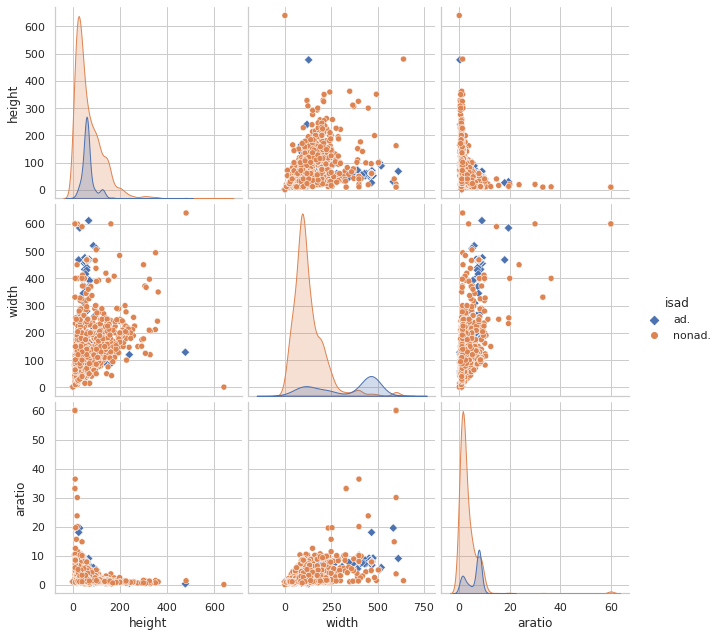

In [201]:
sns.pairplot(data=df,hue='isad', height=3, markers=['D','o'])